[View in Colaboratory](https://colab.research.google.com/github/Iamalos/Coursera-Algorithms-Stanford/blob/master/DP_with_Keras,_Cats_vs_Dogs.ipynb)

In [1]:
!rm -r cats_and_dogs_small

rm: cannot remove 'cats_and_dogs_small': No such file or directory


In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"iamalos","key":"c60799971aa20baf100231595f1d425a"}'}

In [1]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 63 Sep  2 13:47 kaggle.json


In [0]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle competitions download -c dogs-vs-cats

  0%|                                               | 0.00/86.8k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 86.8k/86.8k [00:00<00:00, 40.0MB/s]
 98%|███████████████████████████████████████▍| 267M/271M [00:10<00:00, 27.0MB/s]
100%|████████████████████████████████████████| 271M/271M [00:10<00:00, 27.0MB/s]
 99%|███████████████████████████████████████▌| 537M/543M [00:14<00:00, 34.8MB/s]
100%|████████████████████████████████████████| 543M/543M [00:14<00:00, 39.0MB/s]


In [0]:
import zipfile
zip_ref = zipfile.ZipFile('train.zip', 'r')
zip_ref.extractall()

zip_ref = zipfile.ZipFile('test1.zip', 'r')
zip_ref.extractall()

zip_ref.close()

In [8]:
!ls 

kaggle.json  sampleSubmission.csv  test1.zip  train.zip
sample_data  test1		   train


In [0]:
# Create directories
import os
original_data_set_dir = './train'
base_dir = './cats_and_dogs_small'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)


In [0]:
import shutil
# 1000 for training
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_data_set_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copy(src, dst)

# 500 for validation
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_data_set_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copy(src, dst)
    
# 500 for test
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_data_set_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copy(src, dst)


# Repeat the same for dogs

# 1000 for training
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_data_set_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copy(src, dst)

# 500 for validation
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_data_set_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copy(src, dst)
    
# 500 for test
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_data_set_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copy(src, dst)


In [0]:
!ls ./cats_and_dogs_small/test/cats

In [11]:
# Sanity check
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [52]:
# Network specification
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [0]:
# Configure model for training
from keras import optimizers
model.compile(optimizer = optimizers.RMSprop(lr = 1e-4),
              loss = 'binary_crossentropy',
              metrics = ['acc'])

In [54]:
# Preprocess data
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size = (150, 150), 
    batch_size = 20, 
    class_mode = 'binary')

validation_generator = train_datagen.flow_from_directory(
    validation_dir, 
    target_size = (150, 150), 
    batch_size = 20, 
    class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [55]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [31]:
# Fitting the model
history = model.fit_generator(
    train_generator, 
    steps_per_epoch = 100, 
    epochs = 30, 
    validation_data = validation_generator, 
    validation_steps = 50)

model.save('cats_and_dogs_1.h5')

Epoch 1/30
100/100 [==============================] - 15s 150ms/step - loss: 0.6907 - acc: 0.5235 - val_loss: 0.6707 - val_acc: 0.6020
Epoch 2/30
100/100 [==============================] - 12s 115ms/step - loss: 0.6611 - acc: 0.6115 - val_loss: 0.6490 - val_acc: 0.6310
Epoch 3/30
100/100 [==============================] - 12s 116ms/step - loss: 0.6258 - acc: 0.6450 - val_loss: 0.6157 - val_acc: 0.6590
Epoch 4/30
100/100 [==============================] - 12s 116ms/step - loss: 0.5808 - acc: 0.7025 - val_loss: 0.6799 - val_acc: 0.5910
Epoch 5/30
100/100 [==============================] - 12s 116ms/step - loss: 0.5447 - acc: 0.7410 - val_loss: 0.5922 - val_acc: 0.6790
Epoch 6/30
100/100 [==============================] - 12s 116ms/step - loss: 0.5063 - acc: 0.7570 - val_loss: 0.5489 - val_acc: 0.7280
Epoch 7/30
100/100 [==============================] - 12s 116ms/step - loss: 0.4797 - acc: 0.7725 - val_loss: 0.5384 - val_acc: 0.7350
Epoch 8/30
100/100 [==============================] - 1

In [0]:
import os

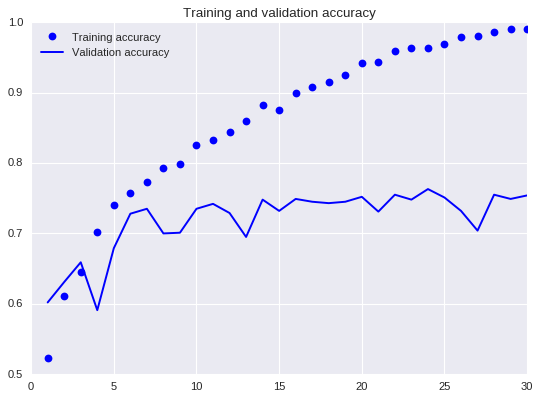

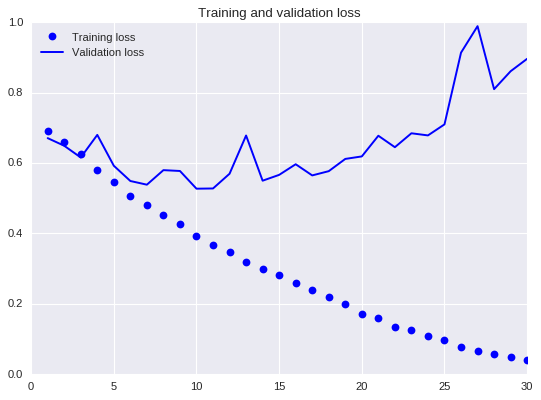

In [49]:
# Plotting accuracy and loss over validation data
import matplotlib.pyplot as plt
plt.style.use('seaborn-notebook')

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc = 'best')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc = 'best')


### Data augmentation

In [0]:
datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest',)

In [0]:
# Displaying some of the transformations
from keras.preprocessing import image
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[4]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)

In [0]:
import numpy as np
x = np.expand_dims(x, 0)

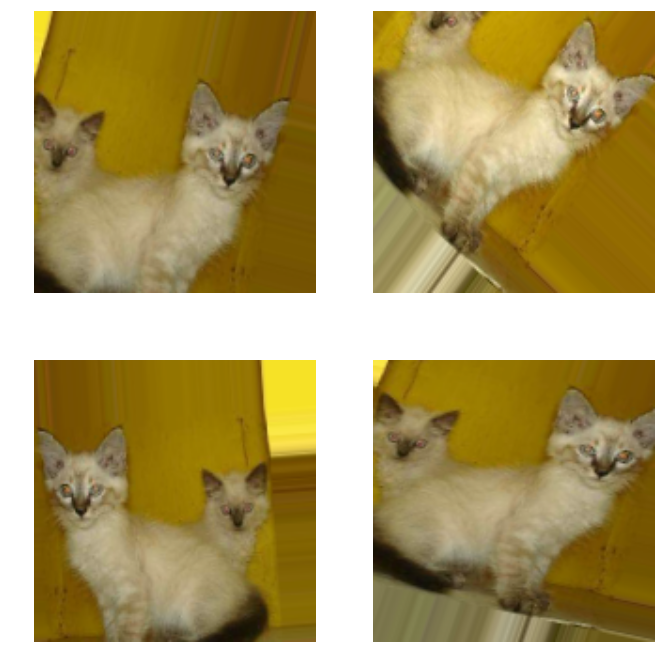

In [86]:
plt.style.use('seaborn-white')
i = 0
fig, axs = plt.subplots(2,2, figsize = (10,10))
axs = axs.ravel()
for batch in datagen.flow(x, batch_size = 1):
    axs[i].imshow(image.array_to_img(batch[0]))
    axs[i].axis('off')
    i += 1
    if i % 4 == 0:
        break
        
plt.show()

In [0]:
# Add Dropout before the first Dense layer
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


In [88]:
# Training the covnet with data augmentation
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 20,
    height_shift_range = 20,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)

# No augmentation is applied to the test data
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(train_generator,
                              steps_per_epoch = 100,
                              epochs = 100,
                              validation_data = validation_generator,
                              validation_steps = 50)


# save the model
model.save('cats_and_dogs_small_2.h5')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 39s 391ms/step - loss: 0.6940 - acc: 0.5100 - val_loss: 0.6792 - val_acc: 0.5819
Epoch 2/100
100/100 [==============================] - 34s 337ms/step - loss: 0.6751 - acc: 0.5791 - val_loss: 0.6626 - val_acc: 0.5692
Epoch 3/100
100/100 [==============================] - 34s 336ms/step - loss: 0.6533 - acc: 0.5997 - val_loss: 0.6498 - val_acc: 0.6079
Epoch 4/100
100/100 [==============================] - 33s 331ms/step - loss: 0.6347 - acc: 0.6416 - val_loss: 0.6650 - val_acc: 0.5869
Epoch 5/100
100/100 [==============================] - 33s 326ms/step - loss: 0.6138 - acc: 0.6566 - val_loss: 0.6331 - val_acc: 0.6301
Epoch 6/100
100/100 [==============================] - 36s 361ms/step - loss: 0.6017 - acc: 0.6694 - val_loss: 0.5805 - val_acc: 0.6745
Epoch 7/100
100/100 [==============================] - 33s 332ms/step - loss: 0.5895 - acc: 0.6794 -

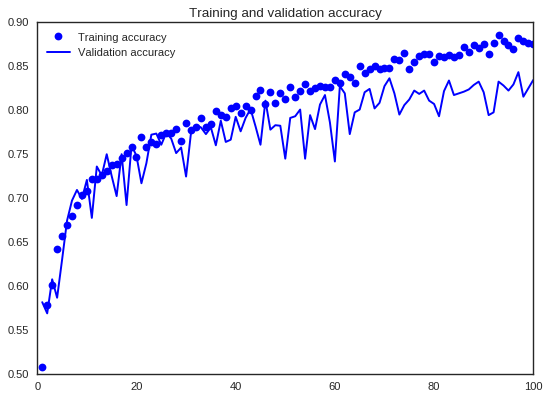

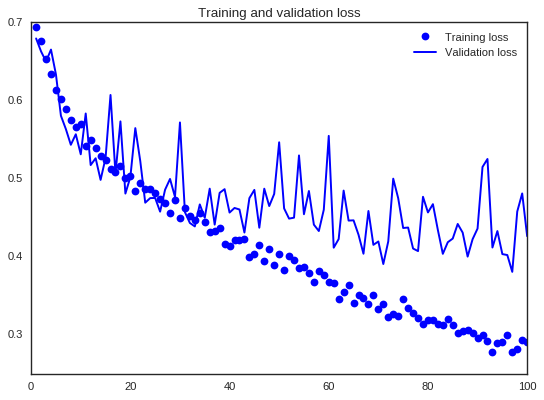

In [89]:
# Plotting accuracy and loss over validation data
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc = 'best')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc = 'best')


## Using pre-trained models

In [2]:
# instantiate VGG-16
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

Using TensorFlow backend.


In [3]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

### Extracting features using the pretrained convolutional base

In [0]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = 'cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [18]:
datagen = ImageDataGenerator(rescale = 1./255)
batch_size = 20
def extract_features(directory, sample_count):
    features = np.zeros(shape = (sample_count, 4, 4, 512))
    labels = np.zeros(shape = (sample_count))
    generator = datagen.flow_from_directory(directory,
                                           target_size = (150,150),
                                           batch_size = batch_size, 
                                            class_mode = 'binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size: (i + 1) * batch_size] = features_batch
        labels[i * batch_size: (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

# Currently features are of shape (sample_count,4,4,512), so we flatten them
train_features = np.reshape(train_features, (-1, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (-1, 4 * 4 * 512))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [19]:
# Training the densely connected layer
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation = 'relu', input_dim = 4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer = optimizers.RMSprop(lr = 2e-5),
             loss = 'binary_crossentropy',
             metrics = ['acc'])

history = model.fit(train_features,
                    train_labels,
                    epochs = 30,
                    batch_size = 20,
                    validation_data = (validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 2s 951us/step - loss: 0.5990 - acc: 0.6750 - val_loss: 0.4372 - val_acc: 0.8490
Epoch 2/30
2000/2000 [==============================] - 1s 506us/step - loss: 0.4239 - acc: 0.8120 - val_loss: 0.3594 - val_acc: 0.8630
Epoch 3/30
2000/2000 [==============================] - 1s 508us/step - loss: 0.3562 - acc: 0.8315 - val_loss: 0.3227 - val_acc: 0.8840
Epoch 4/30
2000/2000 [==============================] - 1s 513us/step - loss: 0.3113 - acc: 0.8735 - val_loss: 0.3079 - val_acc: 0.8750
Epoch 5/30
2000/2000 [==============================] - 1s 504us/step - loss: 0.2922 - acc: 0.8805 - val_loss: 0.2833 - val_acc: 0.8870
Epoch 6/30
2000/2000 [==============================] - 1s 509us/step - loss: 0.2635 - acc: 0.8920 - val_loss: 0.2723 - val_acc: 0.8920
Epoch 7/30
2000/2000 [==============================] - 1s 511us/step - loss: 0.2459 - acc: 0.9060 - val_loss: 0.2610 - val_acc: 0.8970


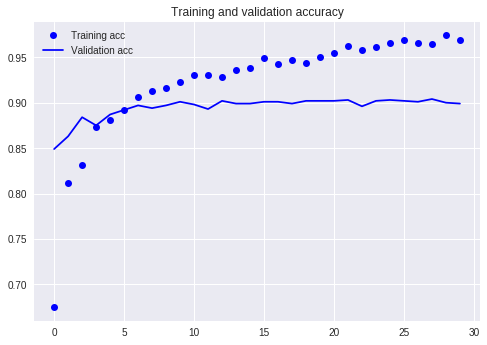

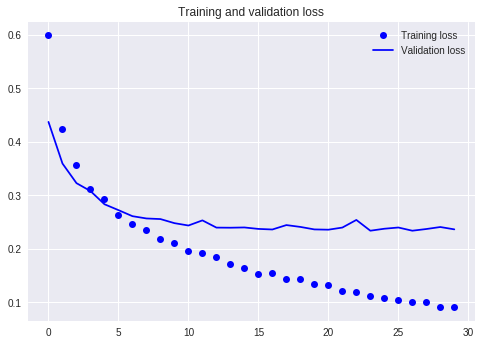

In [20]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Second option - add a densely connected classifier on top of the convolutional base

In [5]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Freeze the conv base
print('This is the number of trainable weights '
     'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [7]:
conv_base.trainable = False
print('This is the number of trainable weights '
          'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers 

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/80
 - 29s - loss: 0.2701 - acc: 0.8835 - val_loss: 0.2409 - val_acc: 0.9030
Epoch 2/80


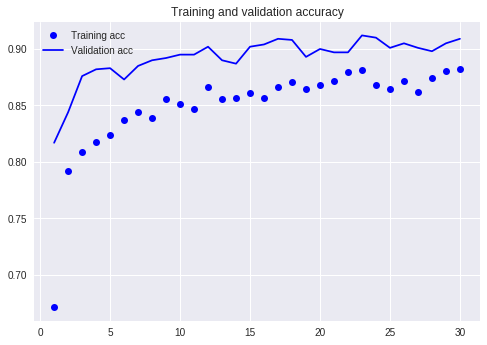

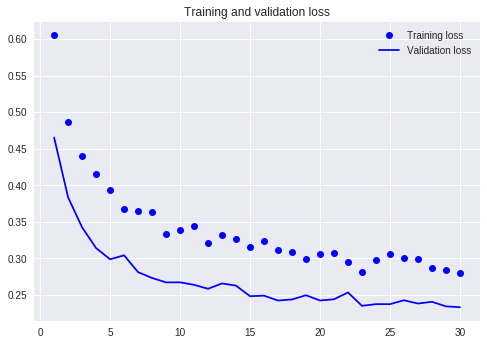

In [9]:
# Let's plot the results again
import matplotlib.pyplot as plt 

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Fine-tuning the model

In [10]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [0]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [0]:
model.compile(loss='binary_crossentropy',
                      optimizer=optimizers.RMSprop(lr=1e-5),
                      metrics=['acc'])
history = model.fit_generator(
              train_generator,
              steps_per_epoch=100,
              epochs=100,
              validation_data=validation_generator,
              validation_steps=50)

Epoch 1/100
100/100 [==============================] - 30s 304ms/step - loss: 0.2993 - acc: 0.8750 - val_loss: 0.2532 - val_acc: 0.9000
Epoch 2/100
100/100 [==============================] - 28s 278ms/step - loss: 0.2584 - acc: 0.8800 - val_loss: 0.2184 - val_acc: 0.9130
Epoch 3/100
100/100 [==============================] - 28s 279ms/step - loss: 0.2376 - acc: 0.8975 - val_loss: 0.2202 - val_acc: 0.9130
Epoch 4/100
100/100 [==============================] - 28s 280ms/step - loss: 0.2214 - acc: 0.9065 - val_loss: 0.1947 - val_acc: 0.9220
Epoch 5/100
100/100 [==============================] - 28s 279ms/step - loss: 0.2100 - acc: 0.9125 - val_loss: 0.2015 - val_acc: 0.9210
Epoch 6/100
100/100 [==============================] - 28s 280ms/step - loss: 0.1861 - acc: 0.9315 - val_loss: 0.1915 - val_acc: 0.9300
Epoch 7/100
100/100 [==============================] - 28s 279ms/step - loss: 0.1728 - acc: 0.9290 - val_loss: 0.1947 - val_acc: 0.9350
Epoch 8/100
100/100 [===========================

In [0]:
# Let's plot the results again
import matplotlib.pyplot as plt 

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
# Smoothing the points
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points
plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
# Final test
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)